# Highway with SB3's DQN

##  Warming up
We start with a few useful installs and imports:

In [ ]:
# Install environment and agent
!pip install highway-env
!pip install stable-baselines3

# Environment
import gym
import highway_env

# Agent
from stable_baselines3 import DQN

# Visualization utils
%load_ext tensorboard
import sys
from tqdm.notebook import trange
!pip install tensorboardx gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git 2> /dev/null
sys.path.insert(0, '/content/highway-env/scripts/')
from utils import record_videos, show_videos

# Playground

Play with some environments

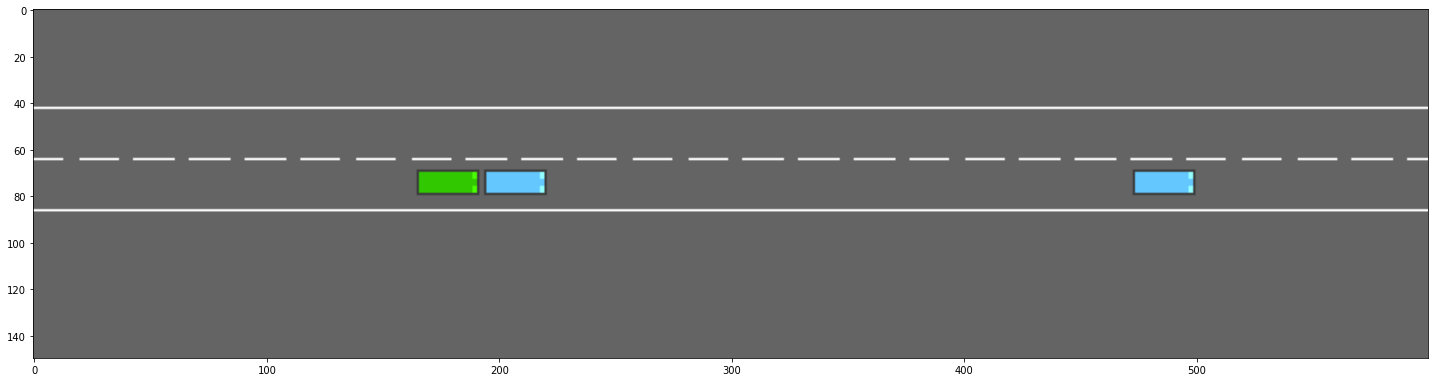

In [31]:
import pprint
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make("two-way-v0")
# pprint.pprint(env.config)

# TODO(xin): set corrent inputs and number of cars

# Render an image and show it.
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, info = env.step(action)
    env.render()

plt.figure(figsize = (25,10))
plt.imshow(env.render(mode="rgb_array"))
plt.show()

# # Record a video
# env = record_videos(env)
# obs, done = env.reset(), False
# while not done:
#     action = env.action_type.actions_indexes["LANE_LEFT"]
#     obs, reward, done, info = env.step(action)
# env.close()
# show_videos()

## Training
Run tensorboard locally to visualize training.

In [ ]:
%tensorboard --logdir "highway_dqn"

In [ ]:
model = DQN('MlpPolicy', "highway-fast-v0",
                policy_kwargs=dict(net_arch=[256, 256]),
                learning_rate=5e-4,
                buffer_size=15000,
                learning_starts=200,
                batch_size=32,
                gamma=0.8,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=50,
                exploration_fraction=0.7,
                verbose=1,
                tensorboard_log="highway_dqn/")
model.learn(int(2e4))


## Testing

Visualize a few episodes

In [ ]:
env = gym.make("highway-fast-v0")
env = record_videos(env)
for episode in trange(3, desc="Test episodes"):
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
env.close()
show_videos()
